In [1]:
#Employee Attrition Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix)

In [2]:
df = pd.read_csv(r'D:\Guvi notes\Employee_Attrition\Employee-Attrition-Mod.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,47,Yes,Non-Travel,543,Sales,2,4,Marketing,1,2504,...,4,80,1,4,3,1,1,0,0,0
2504,46,Yes,Travel_Rarely,1277,Sales,2,3,Life Sciences,1,2505,...,2,80,1,13,5,2,10,6,0,3
2505,23,Yes,Travel_Rarely,160,Research & Development,4,1,Medical,1,2506,...,3,80,0,3,3,1,3,2,1,2
2506,31,Yes,Travel_Frequently,163,Research & Development,24,1,Technical Degree,1,2507,...,4,80,0,9,3,2,5,4,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2508 non-null   int64 
 1   Attrition                 2508 non-null   object
 2   BusinessTravel            2508 non-null   object
 3   DailyRate                 2508 non-null   int64 
 4   Department                2508 non-null   object
 5   DistanceFromHome          2508 non-null   int64 
 6   Education                 2508 non-null   int64 
 7   EducationField            2508 non-null   object
 8   EmployeeCount             2508 non-null   int64 
 9   EmployeeNumber            2508 non-null   int64 
 10  EnvironmentSatisfaction   2508 non-null   int64 
 11  Gender                    2508 non-null   object
 12  HourlyRate                2508 non-null   int64 
 13  JobInvolvement            2508 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.0,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,...,2508.000000,2508.0,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,37.237640,807.967305,9.085726,2.915470,1.0,1254.500000,2.746810,65.762759,2.751196,2.105662,...,2.725279,80.0,0.811404,11.563796,2.808214,2.769537,7.178628,4.336523,2.217305,4.223285
std,9.100037,403.573772,8.086552,1.032012,0.0,724.141561,1.082593,20.368228,0.701229,1.118257,...,1.079548,0.0,0.847294,7.844134,1.288894,0.697249,6.174499,3.625904,3.239697,3.593803
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,2.000000,1.0,627.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,809.000000,7.000000,3.000000,1.0,1254.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1167.250000,14.000000,4.000000,1.0,1881.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2508.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.shape

(2508, 35)

In [9]:
df['Attrition'].value_counts()

Attrition
Yes    1275
No     1233
Name: count, dtype: int64

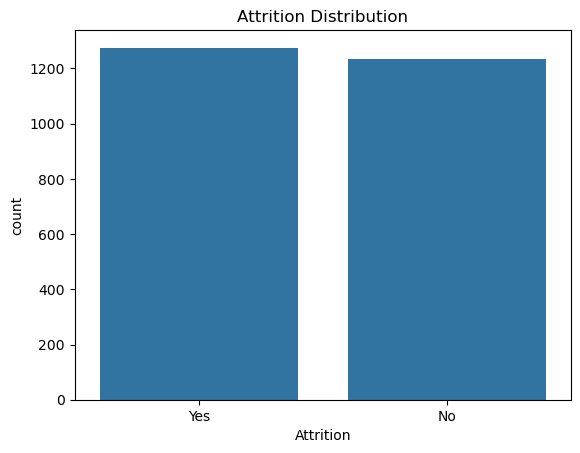

In [10]:
#Target Variable Analysis (Attrition)
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

In [11]:
#Data Preprocessing (Label Encoding)
df_processed = df.copy()

label_encoders = {}

for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

df_processed.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2


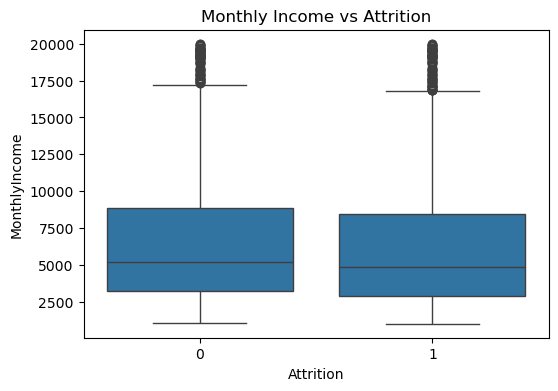

In [12]:
#Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_processed)
plt.title("Monthly Income vs Attrition")
plt.show()

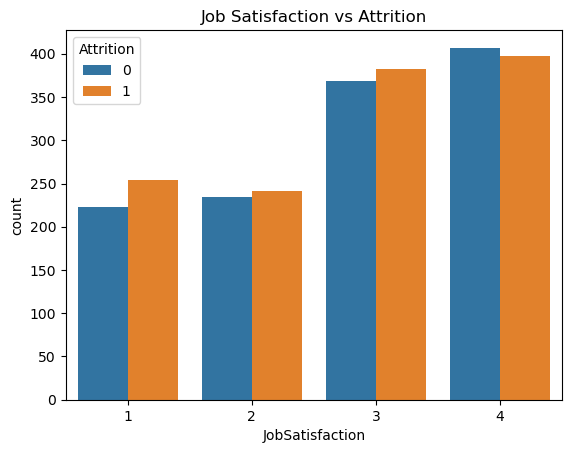

In [13]:
#Job Satisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_processed)
plt.title("Job Satisfaction vs Attrition")
plt.show()

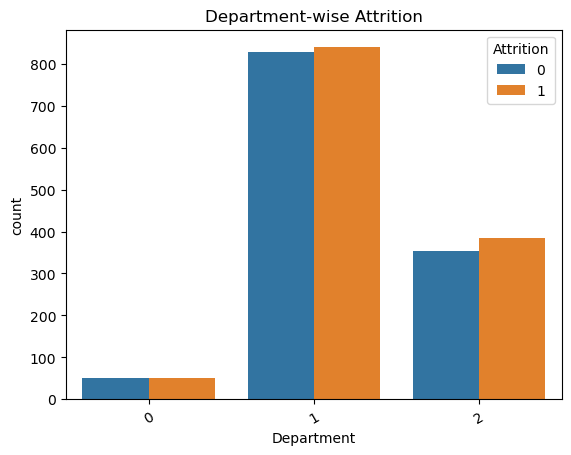

In [15]:
#Department-wise Attrition
sns.countplot(x='Department', hue='Attrition', data=df_processed)
plt.title("Department-wise Attrition")
plt.xticks(rotation=30)
plt.show()

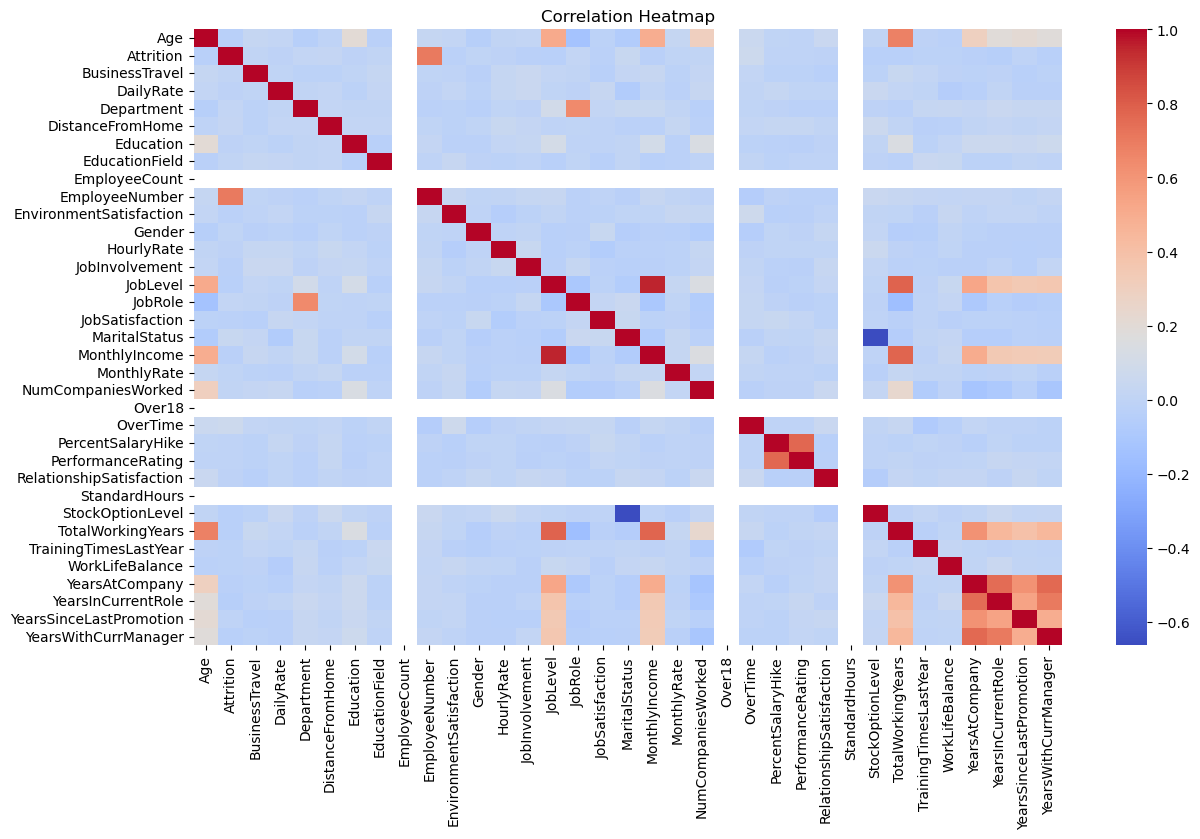

In [16]:
#Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df_processed.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
#Feature Selection & Train-Test Split
X = df_processed.drop("Attrition", axis=1)
y = df_processed["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

Training Size: (1755, 34)
Testing Size: (753, 34)


In [19]:
#Feature Selection & Train-Test Split
X = df_processed.drop("Attrition", axis=1)
y = df_processed["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

Training Size: (1254, 34)
Testing Size: (1254, 34)


In [20]:
# Model Training (Random Forest)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Model Training Completed")

Model Training Completed


In [22]:
#Model Evaluation
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)

Accuracy: 0.9098883572567783
Precision: 0.9811320754716981
Recall: 0.8346709470304976
F1 Score: 0.9019947961838681
AUC-ROC: 0.9339731832831781


In [23]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       631
           1       0.98      0.83      0.90       623

    accuracy                           0.91      1254
   macro avg       0.92      0.91      0.91      1254
weighted avg       0.92      0.91      0.91      1254



In [24]:
confusion_matrix(y_test, y_pred)

array([[621,  10],
       [103, 520]], dtype=int64)

In [25]:
#Feature Importance (Key Attrition Drivers)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
8,EmployeeNumber,0.592260
17,MonthlyIncome,0.031681
0,Age,0.026477
2,DailyRate,0.025847
18,MonthlyRate,0.024267
11,HourlyRate,0.022573
27,TotalWorkingYears,0.020175
4,DistanceFromHome,0.019625
19,NumCompaniesWorked,0.018424
30,YearsAtCompany,0.018249


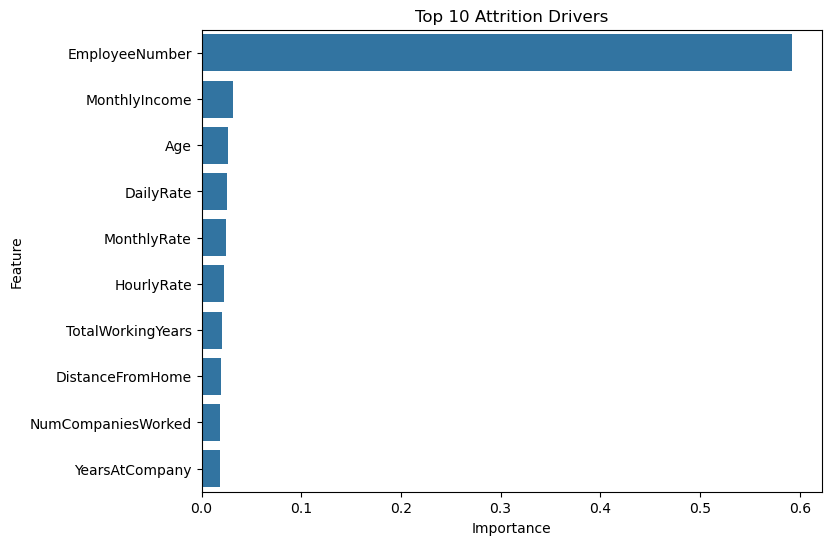

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10))
plt.title("Top 10 Attrition Drivers")
plt.show()

In [27]:
#Identify At-Risk Employees
df_processed['Attrition_Probability'] = rf_model.predict_proba(X)[:,1]
at_risk_employees = df_processed.sort_values(
    by='Attrition_Probability', ascending=False
)
at_risk_employees.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability
2449,36,1,2,711,1,5,4,1,1,2450,...,80,2,9,6,3,3,2,0,2,0.995
2462,38,1,1,1189,1,1,3,1,1,2463,...,80,2,19,4,4,13,11,2,9,0.995
1919,47,1,2,703,2,14,4,2,1,1920,...,80,0,20,2,3,7,7,1,7,0.990
1750,27,1,0,210,2,1,1,2,1,1751,...,80,1,6,0,3,5,4,1,4,0.990
2051,31,1,2,616,1,12,3,3,1,2052,...,80,2,10,2,1,9,7,8,5,0.990
2017,53,1,2,868,2,8,3,2,1,2018,...,80,1,28,3,3,2,0,2,2,0.990
2438,39,1,1,711,1,4,3,3,1,2439,...,80,0,10,2,1,9,2,3,8,0.990
2062,35,1,2,882,2,3,4,1,1,2063,...,80,1,12,2,3,10,9,0,8,0.990
2070,33,1,1,827,1,1,4,4,1,2071,...,80,1,6,2,3,6,5,1,2,0.990
1753,45,1,2,549,1,8,4,4,1,1754,...,80,2,12,3,3,10,9,9,8,0.990


In [ ]:
#Business Insight Summary
#1. Employees with low job satisfaction show higher attrition.
#2. Lower monthly income correlates strongly with attrition.
#3. Overtime significantly increases attrition probability.
#4. Employees with fewer years at company are more likely to leave.
#5. The Random Forest model achieved high predictive performance.

In [28]:
#Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
# RFE (Recursive Feature Elimination)
# Apply RFE (Feature Selection)
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Select top N features (try 10–15)
rfe = RFE(estimator=lr, n_features_to_select=35)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [30]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [31]:
#Retrain Random Forest on Selected Features
rf_rfe = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [33]:
#Re-evaluate Model (After RFE)
y_pred_rfe = rf_rfe.predict(X_test_rfe)
y_prob_rfe = rf_rfe.predict_proba(X_test_rfe)[:, 1]

accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
precision_rfe = precision_score(y_test, y_pred_rfe)
recall_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)
auc_rfe = roc_auc_score(y_test, y_prob_rfe)

print("After RFE Feature Selection")
print("Accuracy:", accuracy_rfe)
print("Precision:", precision_rfe)
print("Recall:", recall_rfe)
print("F1 Score:", f1_rfe)
print("AUC-ROC:", auc_rfe)

After RFE Feature Selection
Accuracy: 0.9122807017543859
Precision: 0.9885714285714285
Recall: 0.8330658105939005
F1 Score: 0.9041811846689896
AUC-ROC: 0.9402334697656909


In [35]:
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Before RFE": [accuracy, precision, recall, f1, auc],
    "After RFE": [accuracy_rfe, precision_rfe, recall_rfe, f1_rfe, auc_rfe]
})

comparison

,Metric,Before RFE,After RFE
0,Accuracy,0.909888,0.912281
1,Precision,0.981132,0.988571
2,Recall,0.834671,0.833066
3,F1 Score,0.901995,0.904181
4,AUC,0.933973,0.940233


In [36]:
#Score Improvement Use Stratified Split , Handle Class Imbalance , Tune Threshold (Boost Recall / F1)
from sklearn.model_selection import StratifiedKFold
rf_rfe = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
rf_rfe.fit(X_train, y_train)
y_pred = rf_rfe.predict(X_test)
y_prob = rf_rfe.predict_proba(X_test)[:, 1]
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_prob))

Accuracy : 0.8944223107569721
Precision: 0.9429824561403509
Recall   : 0.8431372549019608
F1 Score : 0.8902691511387164
AUC      : 0.9404143843772327


In [37]:
# SMOTE for Class Imbalance
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
from imblearn.over_sampling import SMOTENC

cat_features = [i for i, col in enumerate(X.columns)
                if col in categorical_columns]

smote = SMOTENC(
    categorical_features=cat_features,
    random_state=42,
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [38]:
print("Before SMOTENC:")
print(y_train.value_counts())

print("\nAfter SMOTENC:")
print(y_train_sm.value_counts())

Before SMOTENC:
Attrition
1    1020
0     986
Name: count, dtype: int64

After SMOTENC:
Attrition
0    1020
1    1020
Name: count, dtype: int64


In [39]:
#Gradient Boosting (Very Good for Attrition)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1:", f1_score(y_test, y_pred_gb))
print("AUC:", roc_auc_score(y_test, y_prob_gb))

Accuracy: 0.9183266932270916
Precision: 0.9692982456140351
Recall: 0.8666666666666667
F1: 0.9151138716356108
AUC: 0.9613717551798048


In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.9282868525896414
Recall: 0.8705882352941177
F1: 0.925
AUC: 0.9638961657537508


In [42]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.99      0.87      0.93       255

    accuracy                           0.93       502
   macro avg       0.93      0.93      0.93       502
weighted avg       0.93      0.93      0.93       502

